(206,)


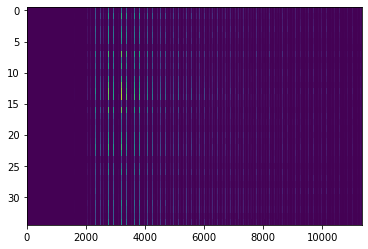


(30, 11330)
(30, 3)
Gominy    11.559871
Tyr        0.423754
Trp        0.099079
dtype: float64
{'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
Правильность на тестовом наборе: 0.62


In [115]:
from gzip import open # NB: overrides standard open()
import pickle as pkl
import tensorly as tl
from tensorly.base import tensor_to_vec,  partial_tensor_to_vec
import numpy as np
import pandas as pd
import warnings 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

warnings.simplefilter('ignore') # отключим предупреждения Anaconda
Xdata_numpy = pkl.load(open('C:/Users/admin/Desktop/88/X.pkl.gz', 'rb'))
Ydata = pkl.load(open('C:/Users/admin/Desktop/88/y.pkl.gz', 'rb'))
print(Xdata_numpy['emission'].shape)
string_name=[]
string_name2=[]
k=0
#создаю пространство имён для развёрнутого тензора
for i in range(len(Xdata_numpy['emission'])):
    for j in range(len(Xdata_numpy['excitation'])):
        string_name+=[str(Xdata_numpy['emission'][i])+" x "+str(Xdata_numpy['excitation'][j])]
        string_name2+=[k]
        k+=1
#создаём пространство образцов
examples_names=[]
v=[]
for i in range(0,35):
    examples_names+=[str(i)]
    v+=[i]
Xdata_numpy['X'].shape = (Xdata_numpy['X'].shape[0], Xdata_numpy['X'].shape[1] * Xdata_numpy['X'].shape[2])
Xdata_numpy['X'][:,np.isnan(Xdata_numpy['X']).any(axis = 0)] = 0 # zero out any columns containing NaN

#рисуем новую матрицу
import matplotlib.pyplot as plt
plt.imshow(Xdata_numpy['X'],aspect="auto")
plt.show();
print()

X=pd.DataFrame(Xdata_numpy['X'],index=examples_names, columns=string_name)
#делим набор на обучающий и тестовый
X_train, X_test, y_train, y_test = train_test_split(
     X, Ydata, test_size=0.1428 
)
print(X_train.shape)
print(y_train.shape)
s=[]

#начинаем применять
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import GridSearchCV


pls2 = PLSRegression()
parametrsNames={
    'copy': [True], 
    'max_iter': [10000], 
    'n_components': range(1,101), 
    'scale': [True], 
    'tol': [1e-06]
}
gridCought=GridSearchCV(pls2, parametrsNames, cv=5)
gridCought.fit(X_train,y_train)
predictors=gridCought.predict(X_test)
s=np.mean((predictors-y_test)**2)

print(s)
print(gridCought.best_params_)
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))



In [116]:
print("Правильность на тестовом наборе: {:.2f}".format(gridCought.score(X_test, y_test)))

Правильность на тестовом наборе: 0.62


In [117]:
print("Наилучшее значение кросс-валидац. правильности: {:.2f}".format(gridCought.best_score_))

Наилучшее значение кросс-валидац. правильности: 0.26


In [118]:
results = pd.DataFrame(gridCought.cv_results_) 
# показываем первые 5 строк 
display(results.head()) 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_copy,param_max_iter,param_n_components,param_scale,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049933,0.008802,0.009425,0.002401,True,10000,1,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.369271,-0.050740,0.881264,-1.628919,-0.986545,-0.283134,0.910097,15
1,0.057454,0.006394,0.010427,0.001397,True,10000,2,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.686978,-0.106446,0.932568,-0.250289,-0.682349,0.116092,0.602297,5
2,0.081316,0.035217,0.008121,0.001467,True,10000,3,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.615440,0.270699,0.944681,-0.175247,-0.341923,0.262730,0.478948,1
3,0.069384,0.003942,0.007821,0.001081,True,10000,4,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.598640,0.426477,0.920132,-0.664507,-0.284856,0.199177,0.585021,2
4,0.119318,0.013530,0.009926,0.002895,True,10000,5,True,1e-06,"{'copy': True, 'max_iter': 10000, 'n_component...",0.599354,0.433481,0.900428,-1.129021,-0.036366,0.153575,0.709364,4


In [104]:
scores = np.array(results.mean_test_score).reshape(100, 1) 
import mglearn 
# строим теплокарту средних значений правильности перекрестной проверки 
mglearn.tools.heatmap(scores, xlabel='n_components', xticklabels=parametrsNames['n_components'], 
                      ylabel='max_iter', yticklabels=parametrsNames['max_iter'], cmap="viridis")

ModuleNotFoundError: No module named 'mglearn'

In [119]:
from  sklearn.metrics import  mean_squared_error
final_mse = mean_squared_error (y_test,  predictors) 
final_rmse  =  np.sqrt(final_mse)  
print(final_rmse)

2.0068801650690884


In [71]:
type(y_test)

pandas.core.frame.DataFrame

In [120]:
print(predictors[:,0])
print(y_test.iloc[:,0])


[42.45749537 33.45570279 27.89651454 44.61298803 35.80126594]
31    39.901821
3     31.410666
19    34.070473
10    47.577334
17    36.226228
Name: Gominy, dtype: float64


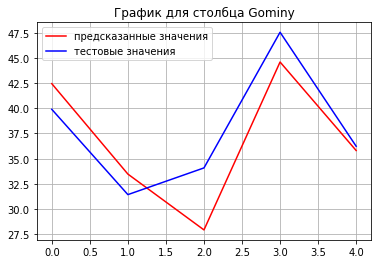

In [121]:
b=[]
for  i in range(0,5):
    b+=[i]
plt.plot(b,predictors[:,0],color="red",label="предсказанные значения")
plt.plot(b,y_test.iloc[:,0],color="blue", label="тестовые значения")
plt.legend()
plt.grid(True)
plt.title("График для столбца Gominy")
plt.show();


In [106]:
cvres  =  gridCought.cv_results_ 
for mean_score,  params  in zip (cvres [ "mean_test_score" ], cvres [ "params" ] ): 
    print (np.sqrt(-mean_score),  params)


nan {'copy': True, 'max_iter': 10000, 'n_components': 1, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 2, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 3, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 4, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 5, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 6, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 7, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 8, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 9, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 10, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components': 11, 'scale': True, 'tol': 1e-06}
nan {'copy': True, 'max_iter': 10000, 'n_components'